### 分类识别

MNIST手写数字识别数据集：
![](./images/1.png)

`MNIST数据集`来自美国的标准与技术研究所，数据集由来自250个不同人手写的数字构成，其中50%是高中生，50% 来自普查局的工作人员。

整个数据集包括训练集55000张图片，验证集5000张图片，测试集10000张图片。


#### 数据集获取

MNIST数据集可在[http://yann.lecun.com/exdb/mnist/]() 直接下载，也可以使用Tensorflow提供的数据集读取方法获取。

In [1]:
import tensorflow as tf 
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('MNIST/',one_hot=True)

W0326 16:24:58.442808 4640140736 deprecation.py:323] From <ipython-input-1-7bbdc690e9c8>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0326 16:24:58.443493 4640140736 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0326 16:24:58.444159 4640140736 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:

#### 查看数据集的数量

In [2]:
print('训练集数量：',mnist.train.num_examples)
print('验证集数量：',mnist.validation.num_examples)
print('测试集数量：',mnist.test.num_examples)

训练集数量： 55000
验证集数量： 5000
测试集数量： 10000


In [3]:
print('图片形状：',mnist.train.images.shape,'标签形状：',mnist.train.labels.shape)

图片形状： (55000, 784) 标签形状： (55000, 10)


#### 查看一张图片的具体数据

In [4]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
len(mnist.train.images[0])

784

In [6]:
mnist.train.images[0].shape

(784,)

#### 可视化image

In [7]:
import matplotlib.pyplot as plt 

In [8]:
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

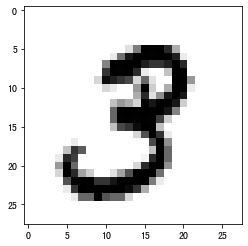

In [9]:
plot_image(mnist.train.images[1])

#### 关于reshape

In [10]:
import numpy as np
int_array = np.array([1,2,4,5,6,7])
int_array.reshape(2,3)

array([[1, 2, 4],
       [5, 6, 7]])

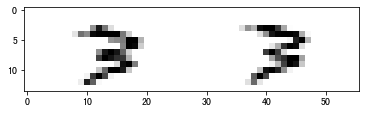

In [11]:
plt.imshow(mnist.train.images[20000].reshape(14,56),cmap='binary')
plt.show()

len(mnist.train.images[0])

#### 标签数据与独热编码

In [12]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

##### 独热编码
独热编码是一种`稀疏向量`,其中，一个元素设为1，所有其他元素设为0.

独热编码常用于表示拥有`有限个可能值`的字符串或者标识符。

例如：假设某个植物学数据集记录了15000个不同的物种，其中每个物种都用独一无二的字符串标识符来表示。在特征工程过程中，可能需要将这个字符串标识符编码为独热向量，向量的大小为15000.

对于这里的表标签值，使用独热编码后得到的就是一个向量大小为10的独热向量。

采用独热编码的好处：

* 将离散特征的取值扩展到来欧式空间，离散特征的某个取值就对应欧式空间的某个点；
* 机器学习算法中，特征之间距离的计算或相似度常用的计算方法都是基于欧式空间的；
* 将离散特征使用独热编码后，会让特征之间的距离计算更加合理。

![](./images/2.png)